In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as stf
import statsmodels.stats.api as sts
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import scipy

In [2]:
raw_data = pd.read_csv("botswana.tsv", header=0, sep='\t')
raw_data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [3]:
try:
    raw_data['nevermarr'] = raw_data['agefm'].apply(lambda x: 1 if str(x).lower() == 'nan' else 0)
    raw_data.drop('evermarr', axis=1, inplace=True)
except KeyError:
    print("Already_deleted")
raw_data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [4]:
raw_data["agefm"] = raw_data["agefm"].apply(lambda x: 0 if str(x).lower() == 'nan' else x)

In [5]:
def fill_const_c(value1, ret_value2, nan_ret):
    if (value1 == 1) and (str(ret_value2).lower() == 'nan'):
        return nan_ret
    else:
        return ret_value2

raw_data["heduc"] = raw_data.apply(lambda x: fill_const_c(x.nevermarr, x.heduc, -1), axis=1)

In [6]:
raw_data.shape[0] - sum(raw_data['heduc'].value_counts())
#raw_data[raw_data['heduc'].astype(str) == 'nan'].shape

123

In [7]:
for return_value, _name_ in ((-1, "idlnchld"), (-2, "heduc"), (-1, "usemeth")):
    new_name = _name_ + "noans"
    raw_data[new_name] = raw_data[_name_].apply(lambda x: 1 if str(x).lower() == 'nan' else 0)
    raw_data[_name_] = raw_data.apply(lambda x: fill_const_c(x[new_name], x[_name_], return_value), axis=1)

In [8]:
a = raw_data.dropna().shape
print(a[0] * a[1])

78264


                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        06:50:02   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


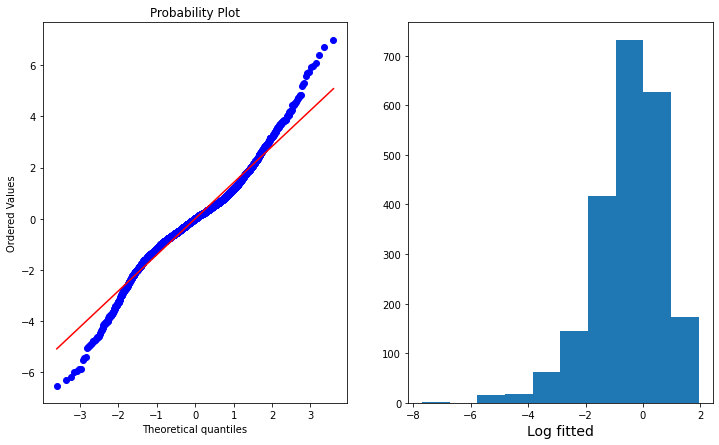

In [48]:
linear_model_zero = stf.ols("ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + \
                            heduc + urban + electric + radio + tv + bicycle + nevermarr + \
                            idlnchldnoans + heducnoans + usemethnoans", data=raw_data)
fitted = linear_model_zero.fit()
print(fitted.summary())
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
scipy.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(1,2,2)
plt.hist(np.log(fitted.resid))
plt.xlabel('Log fitted', fontsize=14)
plt.show()

In [10]:
scipy.stats.shapiro(fitted.resid)

ShapiroResult(statistic=0.9700424671173096, pvalue=3.217239791488696e-29)

In [11]:
#   Проверка на гомоскедастичность
sts.het_breuschpagan(fitted.resid, fitted.model.exog)[1]

1.1452927633445016e-225

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.8
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        06:49:37   Log-Likelihood:                -7735.7
No. Observations:                4349   AIC:                         1.550e+04
Df Residuals:                    4334   BIC:                         1.560e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.0698      0.198     -5.393

/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


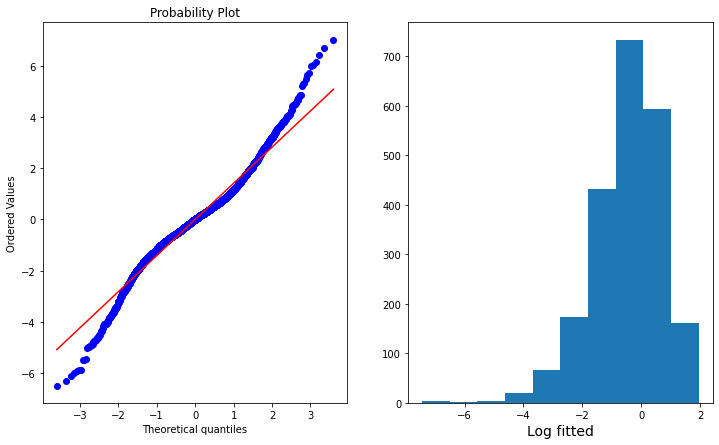

9.024339950902858e-229

In [45]:
#   Удаленные признаки
linear_model_1 = stf.ols("ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + \
                            heduc + urban + electric + bicycle + nevermarr + \
                            idlnchldnoans + heducnoans + usemethnoans", data=raw_data)
fitted = linear_model_1.fit()
print(fitted.summary())
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
scipy.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(1,2,2)
plt.hist(np.log(fitted.resid))
plt.xlabel('Log fitted', fontsize=14)
plt.show()
sts.het_breuschpagan(fitted.resid, fitted.model.exog)[1]

In [23]:
linear_model_zero.fit().compare_f_test(linear_model_1.fit())

(0.7673201660072849, 0.5955615664841584, 6.0)

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.7
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        06:49:44   Log-Likelihood:                -7735.7
No. Observations:                4349   AIC:                         1.550e+04
Df Residuals:                    4334   BIC:                         1.560e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.0698      0.258     -4.152

/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


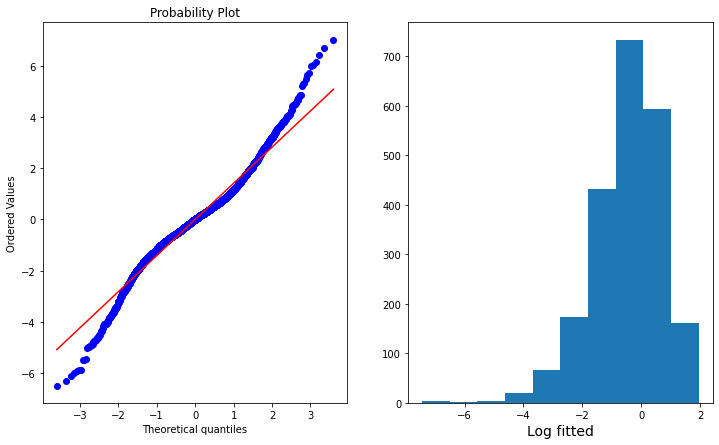

9.024339950902858e-229

In [46]:
#   Делаем поправку Уайта
linear_model_HC = stf.ols("ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + \
                            heduc + urban + electric + bicycle + nevermarr + \
                            idlnchldnoans + heducnoans + usemethnoans", data=raw_data)
fitted = linear_model_HC.fit(cov_type="HC1")
print(fitted.summary())
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
scipy.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(1,2,2)
plt.hist(np.log(fitted.resid))
plt.xlabel('Log fitted', fontsize=14)
plt.show()
sts.het_breuschpagan(fitted.resid, fitted.model.exog)[1]

In [56]:
#   Скорее всего максимально криво и неправильно. Нужно ждать ответа на форуме
linear_model_1.fit().compare_f_test(linear_model_HC_DEL.fit())

(92.91524538041648, 3.0801200123445724e-40, 2.0)

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     396.6
Date:                Mon, 09 Aug 2021   Prob (F-statistic):               0.00
Time:                        06:32:44   Log-Likelihood:                -7827.0
No. Observations:                4349   AIC:                         1.568e+04
Df Residuals:                    4336   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.1932      0.262     -4.563

/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


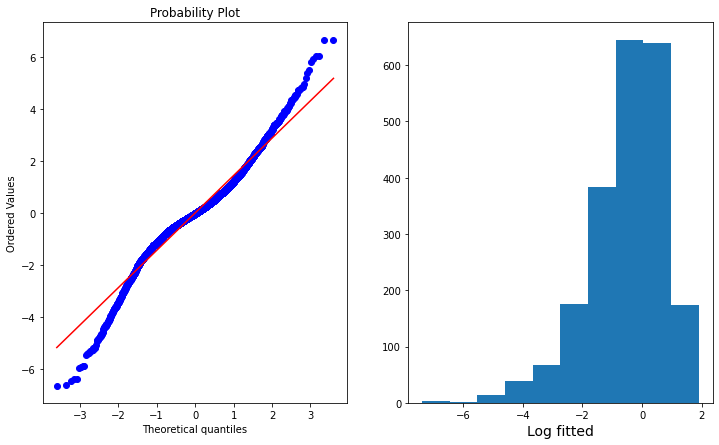

(92.91524538041648, 3.0801200123445724e-40, 2.0)

In [18]:
#   Порежем модель специально
linear_model_HC_DEL = stf.ols("ceb ~ age + educ + idlnchld + knowmeth + agefm + \
                            heduc + urban + electric + bicycle + nevermarr + \
                            idlnchldnoans + heducnoans", data=raw_data)
fitted = linear_model_HC_DEL.fit(cov_type="HC1")
print(fitted.summary())
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
scipy.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(1,2,2)
plt.hist(np.log(fitted.resid))
plt.xlabel('Log fitted', fontsize=14)
plt.show()
linear_model_HC.fit().compare_f_test(linear_model_HC_DEL.fit())